# **Research Notebook 01: ISOT Dataset - Exploratory Data Analysis**

In [1]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
# Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Define File Paths

base_path = '/content/drive/MyDrive/Research/datasets/'
true_path = f'{base_path}True.csv'
fake_path = f'{base_path}Fake.csv'

In [4]:
# Load Datasets

print("\nLoading datasets...")

df_true = pd.read_csv(true_path)
df_fake = pd.read_csv(fake_path)

print(f"Successfully loaded True.csv: {len(df_true)} articles")
print(f"Successfully loaded Fake.csv: {len(df_fake)} articles")


Loading datasets...
Successfully loaded True.csv: 21417 articles
Successfully loaded Fake.csv: 23481 articles


In [9]:
# Overview of the datasets

print("\nOverview of the Real News portion of the dataset:")
df_true.head()


Overview of the Real News portion of the dataset:


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [10]:
print("\nOverview of the Fake News portion of the dataset:")
df_fake.head()


Overview of the Fake News portion of the dataset:


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [11]:
# Combine Datasets for Analysis
# We add a 'label' column to each before merging them into one big DataFrame.

df_true['label'] = 'real'
df_fake['label'] = 'fake'
df_combined = pd.concat([df_true, df_fake]).reset_index(drop=True)

print(f"\nCombined dataset has {len(df_combined)} total articles.")


Combined dataset has 44898 total articles.


## **EXPLORATORY DATA ANALYSIS (EDA)**

In [12]:
# Check for Duplicates

print("\nChecking for duplicate rows...")
duplicate_count = df_combined.duplicated().sum()
print(f"Found {duplicate_count} duplicate rows.")
print("Note: If there're duplicates, we will remove these duplicates in our next 'Data Preparation' script.")


Checking for duplicate rows...
Found 209 duplicate rows.
Note: If there're duplicates, we will remove these duplicates in our next 'Data Preparation' script.


In [13]:
# Check for Null/Missing Values

print("\nChecking for null (missing) values...")
print(df_combined.isnull().sum())


Checking for null (missing) values...
title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [14]:
# Analyze 'subject' Categories

print("\nAnalyzing 'subject' categories...")

print("\n--- 'Real' News Subject Categories ---")
real_counts = df_true['subject'].value_counts()
print(real_counts)

print("\n--- 'Fake' News Subject Categories ---")
fake_counts = df_fake['subject'].value_counts()
print(fake_counts)


# Political news Analysis

real_politics_count = real_counts.get('politicsNews', 0)
fake_politics_count = fake_counts.get('politics', 0)

print("\n--- Analysis ---")
print(f"1. 'Real' news has 'politicsNews' ({real_politics_count} articles).")
print(f"2. 'Fake' news has 'politics' ({fake_politics_count} articles).")
print("We will use these two categories to create our balanced dataset.")


Analyzing 'subject' categories...

--- 'Real' News Subject Categories ---
subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

--- 'Fake' News Subject Categories ---
subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

--- Analysis ---
1. 'Real' news has 'politicsNews' (11272 articles).
2. 'Fake' news has 'politics' (6841 articles).
We will use these two categories to create our balanced dataset.



Visualizing class imbalance for Political articles...


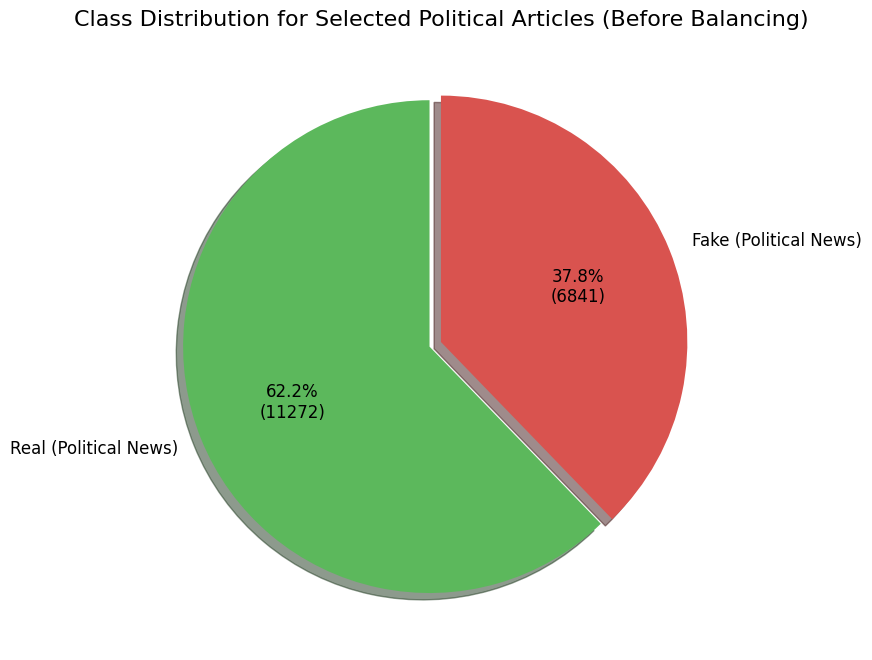

In [17]:
# Visualize Political News Imbalance
# This pie chart shows the imbalance in our selected categories.
# This is the "BEFORE" picture that justifies our balancing in the next script.

print("\nVisualizing class imbalance for Political articles...")

# Data from the previous cell
pie_labels = ['Real (Political News)', 'Fake (Political News)']
pie_sizes = [real_politics_count, fake_politics_count]
pie_colors = ['#5cb85c', '#d9534f'] # Green for real, red for fake
pie_explode = (0.05, 0) # Slightly separate the 'real' slice

plt.figure(figsize=(8, 8))
plt.pie(pie_sizes,
        labels=pie_labels,
        autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, (p/100)*sum(pie_sizes)), # Show percentage and raw count
        colors=pie_colors,
        explode=pie_explode,
        shadow=True,
        startangle=90,
        textprops={'fontsize': 12})

plt.title('Class Distribution for Selected Political Articles (Before Balancing)', fontsize=16)
plt.ylabel('') # Hides the default ylabel
plt.show()

In [15]:
#  Analyze Text Length
# We'll calculate the word count for each article to understand their length.

print("\nAnalyzing text length...")
df_combined['text_length'] = df_combined['text'].astype(str).apply(lambda x: len(x.split()))

print("Descriptive statistics for article length (in words):")
print(df_combined['text_length'].describe())


Analyzing text length...
Descriptive statistics for article length (in words):
count    44898.000000
mean       405.282284
std        351.265595
min          0.000000
25%        203.000000
50%        362.000000
75%        513.000000
max       8135.000000
Name: text_length, dtype: float64



Generating text length histogram...


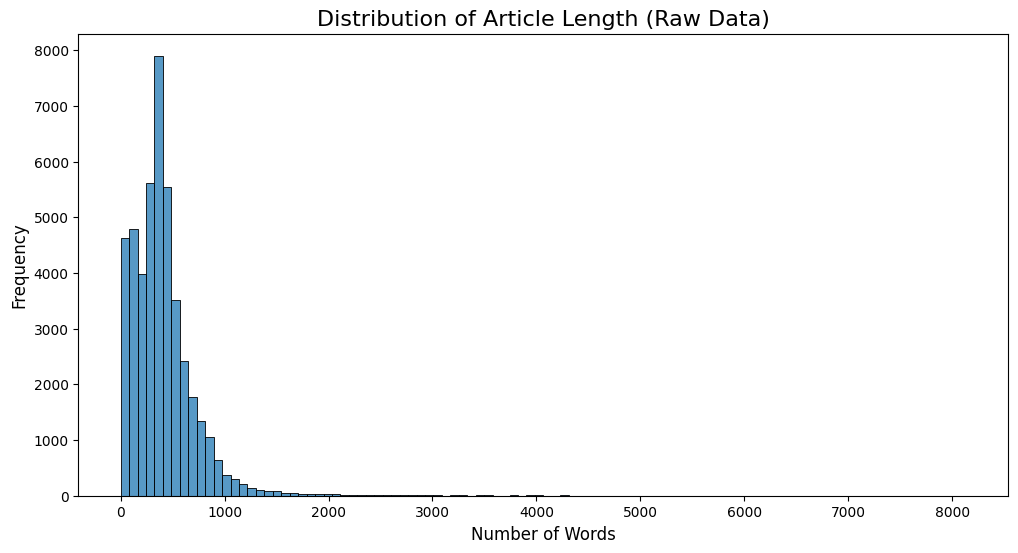

In [16]:
# Visualize Text Length Distribution
# A histogram is the best way to see the distribution of article lengths.

print("\nGenerating text length histogram...")

# Set the visual style for our plots
# sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
# Plot a histogram of the text lengths
sns.histplot(df_combined['text_length'], bins=100, kde=False)
plt.title('Distribution of Article Length (Raw Data)', fontsize=16)
plt.xlabel('Number of Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()